# Résolution d'Équations Différentielles Ordinaires I

Objectifs :
- Implémentation de la méthode d'Euler explicite.
- Implémentation de la méthode d'Euler implicite.
- Représentation graphique
- Mise en évidence de leur ordre (de convergence) sur des exemples.
- Utilisation des routines de scipy pour la résolution d'EDO

## Méthode d'Euler explicite
### L'algorithme
On considère l'équation différentielle
$$
(1) \qquad \qquad \left\{ \begin{array}{l l}\dot x=f(x,t),\\ x(0)=x_0. \end{array}\right. 
$$
On a utilisé ci-dessus la notation $\dot x =\frac{d}{dt}x$. On se donne une condition initiale $x_0\in \mathbb R^n$ et un temps $t$, et on cherche à calculer numériquement $x(t)$. La méthode d'Euler explicite consiste à prendre un nombre de discrétisation $K$, à définir le pas de temps $h=\frac tK$, et à calculer la suite $(x_{k})_{0\leq k \leq K}$ itérativement par :
$$
(2)\qquad x_{k+1}=x_k+hf(x_k).
$$
L'idée est que $x_k$ va alors approximer $x(k h)$, et que $x_K$ approximera donc $x(t)$. Voir votre cours pour plus d'explications.

La fonction `eul_exp(f,x0,t,K)` ci-dessous prend en entrée une fonction $f:\mathbb R^n\times \mathbb R \rightarrow \mathbb R^n$, une position initiale $x_0\in \mathbb R^n$, un temps $t$ et un nombre de discrétisation $K$, et renvoie une valeur approchée de $x(t)$ calculée à l'aide du schéma d'Euler explicite pour un pas de temps $t/K$.

In [44]:
import numpy as np
def eul_exp(f,x0,t,K):
    y=np.copy(x0)     # y représente initialement le vecteur x0
    h=t/K
    for k in range(K):
        y=y+h*f(y,k*h)     # puis y représente l'itéré x_{k+1} de l'algorithme d'Euler explicite pour k entre 0 et N-1
    return(y)

### Illustration sur un exemple
On la teste ci-dessous sur l'exemple de l'équation différentielle ordinaire (EDO) :
$$
(3)\qquad \dot x =x-x^3+t,
$$
pour la donnée initiale $x_0=4$ et un temps $t=5$.

In [45]:
def f1(x,t):
    return(x-x**3+t)
x01=4
eul_exp(f1,x01,5,100)

1.8936200736888098

Pour représenter l'ensemble des valeurs prises dans le temps sur $[0,t]$, il convient de garder toutes les valeurs $(x_k)_{0\leq k \leq K}$.

La fonction `eul_exp2(f,x0,t,K)` ci-dessous prend en entrée une fonction $f:\mathbb R^n\times \mathbb R \rightarrow \mathbb R^n$, une position initiale $x_0\in \mathbb R^n$, un temps $t$ et un nombre de discrétisation $K$, et renvoie la matrice $X$ dont la k-ième ligne est le vecteur $x_k$ calculé à l'aide du schéma d'Euler explicite pour un pas de temps $t/K$.

In [46]:
def eul_exp2(f,x0,t,K):
    n=len(x0)
    X=np.zeros([K+1,n])
    X[0]=x0     # la premiere ligne de M est le vecteur x0
    h=t/K
    for k in range(K):
        X[k+1]=X[k]+h*f(X[k],k*h)     # puis y représente l'itéré x_{k+1} de l'algorithme d'Euler explicite pour k entre 0 et N-1
    return(X)

On l'utilise ci-dessous pour représenter la courbe $\{(t,x(t)) \ 0\leq t\leq 5\}$ de l'exemple (3) précédent pour la même donnée initiale $x_0=4$.

Text(0, 0.5, 'x(t)')

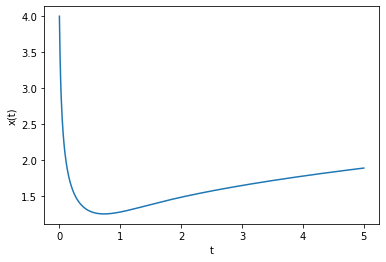

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
def f2(x,t):
    return(np.array([x[0]-x[0]**3+t]))
x02=np.array([4])
X2=eul_exp2(f2,x02,5,1000)
T2=np.linspace(0,5,1001)
plt.plot(T2,X2)
plt.xlabel("t")
plt.ylabel("x(t)")

### Exercices

__Exercice 1 (modèle de Bass pour la diffusion d'un produit)__
On dénote par $x(t)\in [0,1]$ la proportion de la population qui a acquis le produit. Sur un intervalle de temps infinitésimal de taille $\Delta t$, parmi les individus qui n'ont pas encore le produit, certains peuvent "innover" et acheter le produit avec une probabilité $p \Delta t$ (où $p$ est coefficient d'innovation). D'autres, s'ils rencontrent un individu ayant déjà acquis le produit, peuvent "imiter" et acheter le produit avec une probabilité $q\Delta t$ (où $q$ est le coefficient d'imitation).

L'équation différentielle ordinaire correspondante est :

$$
(4)\qquad x'(t)=(1-x(t))p+(1-x(t))x(t)q
$$

__1.__ Expliquer formellement (c'est-à-dire sans trop de détails techniques), pourquoi l'équation (4) correspond bien au paragraphe introductif du modèle.

__2.__ On suppose que le temps est mesuré en années, que $p=0.5$ et $q=3$, et qu'initialement personne ne possède le produit $x(0)=0$. À l'aide des fonctions `eul_exp` ou `eul_exp2` représenter graphiquement la courbe $\{(t,x(t)), \ 0\leq t \leq 2\}$ de la solution de (4). Que constatez-vous lorsque $t\to \infty$ ?

__3__ La fraction d'innovateur dans la population sur un intervalle de taille $\Delta t$ est $(1-x)p \Delta t$. La fraction totale d'individus ayant innové jusqu'au temps $T$ est donc $\int_0^T (1-x(t))p dt$. Par la méthode des rectangles à gauche, cette intégrale est approximée par $\sum_{k=0}^{K-1} h(1-x(k h))p $ où $h=\frac TK$. En calculant $x$ avec la méthode d'Euler explicite pour le même pas de temps $h$, cette intégrale est ensuite approximée par $hp\sum_{k=0}^{K-1} (1-x_k) $ où $x_k$ est donné par (2).

Calculer numériquement de cette manière, pour la même condition initiale que la question __2.__, la fraction d'individus ayant innové jusqu'aux temps 1 et 2.

__4.__ La fraction d'imitateur sur un intervalle de taille $\Delta t$ est $x(1-x)q \Delta t$. La fraction totale d'imitateur jusqu'au temps $T$ est donc $\int_0^T x(t)(1-x(t))qdt$. Calculer numériquement pour la même condition initiale que la question __2.__, et de la même manière qu'à la question __3.__, la fraction d'individus ayant imité jusq'aux temps 1 et 2. Vérifier qu'au temps 2 la somme de la fraction d'individus ayant innové et de la fraction d'individus ayant imité est égale à $1$.

__Exercice 2__
On considère l'équation différentielle ordinaire
$$
(5)\qquad \dot x=x^2
$$
pour la donnée initiale $x(0)=1$.

__1.__ On pose $t=2$. Calculer l'approximation $x_K$ de $x(2)$ donnée par la méthode d'Euler explicite, en utilisant la fonction `eul_exp`, pour $K=5,10,15,20,30$. Que constatez-vous ?

__2.__ Calculer explicitement à la main la solution de (5) pour la donnée initiale $x(0)=1$. Proposer une explication pour le constat fait à la question __1.__

## Méthode d'Euler implicite
### L'algorithme
On cherche toujours à résoudre les solutions de
$$
\left\{ \begin{array}{l l} \dot x=f(x,t),\\ x(0)=x_0. \end{array} \right.
$$
Lorsque $x_k$ (représentant une approximation de $x(t)$ au temps $t_k=k h$ avec $h=t/K$) est calculé, on calcule $x_{k+1}$ en résolvant :
$$
(2) \qquad \qquad x_{k+1}=x_k+hf(x_{k+1},t_{k+1}).
$$
On peut réécrire (2) sous la forme $x_{k+1}-x_k-hf(x_{k+1},t_{k+1})=0$. Pour $x_k$, $t_{k+1}$ et $h$ donnés, l'équation (2) pour $x_{k+1}$ est donc un système non-linéaire de la forme :
$$
(3)\qquad \qquad F_{x_k,t_{k+1},h}(x_{k+1})=0,
$$
avec
$$
(4) \qquad \qquad F_{x,t,h}(y)=y-x-hf(y,t).
$$

On choisit de résoudre (3) à l'aide de l'algorithme de Newton-Raphson vu dans le cours sur la résolution de systèmes non linéaires. Sa mise en pratique demande que la fonction $F_{x_k,t_{k+1},h}$ soit différentiable. On suppose donc que $f$ est différentiable par rapport à la première variable. La matrice Jacobienne de $F_{x_k,t_{k+1},h}$ est alors donnée par :
$$
(5) \qquad \qquad JF_{x_k,t_{k+1},h}(x_{k+1})(y)=Id-hJ_xf(y,t)
$$
où $J_xf(y,t)$ est la matrice de la Jacobienne de $f$ par rapport à la première variable seulement. On commence par rappeler ci-dessous le code de l'algorithme de Newton-Raphson.

In [78]:
def new_rap(F,JF,x0,eps,N):
    e=2*eps
    n=0
    x=x0
    while e>eps and n<N:
        x=x-np.linalg.solve(JF(x),F(x))
        e=np.linalg.norm(F(x))
        n=n+1
    if n<N:
        return(x)
    else:
        return("l'algorithme n'a pas converge")

La fonction `eul_imp(f,Jxf,x0,t,K,eps,N)` ci-dessous prend en entrée une fonction $f$, sa différentielle par rapport à la première variable $J_xf$, une donnée initiale $x_0$, un temps $t$, un nombre de discrétisation $K$, ainsi qu'un seuil d'erreur $\epsilon$ et un nombre maximal d'itération $N$ pour l'appel de la fonction `new_rap` dont le code est ci-dessus.

In [79]:
def eul_imp(f,Jxf,x0,t,K,eps,N):
    n=len(x0)
    y=np.copy(x0)        # y représente initialement le vecteur x0
    h=t/K
    for k in range(K):
        def F_aux(x):       # F_aux represente la fonction F_{x_k,t_{k+1},h} donnee par (4)
            return(x-h*f(x,(k+1)*h)-y)
        def JF_aux(x):
            return(np.identity(n)-h*Jxf(x,(k+1)*h))   # JF_aux represente la fonction JF_{x_k,t_{k+1},h} donnee par (5)
        z=new_rap(F_aux,JF_aux,y,eps,N)    # on prend y qui represente x_k comme valeur initiale pour l'algorithme de Newton-Raphson 
        y=z              # puis on met a jour y pour qu'il represente l'itere x_{k+1} de l'algorithme d'Euler implicite
    return(y)

On teste la fonction `eul_imp` pour résoudre le même exemple d'EDO que celui traité dans la première section sur le schéma d'Euler explicite :
$$
\dot x =x-x^3+t
$$
pour la donnée initiale $x_0=4$ et un temps $t=5$.

In [212]:
def f5(x,t):
    return(np.array([x[0]-x[0]**3+t]))
def Jxf5(x,t):
    return(np.array([1-3*x[0]**2]))
x05=np.array([4])
eul_imp(f5,Jxf5,x05,5,10,0.01,10)

array([1.89486795])

### Exercices
__Exercice 3.__

Au lieu d'avoir à coder de nouveau l'algorithme de Newton-Raphson, en écrivant la fonction `new_rap`, on aurait pu utiliser une routine de scipy.optimize.

__1.__ Écrire une fonction `eul_imp2(f,x0,t,K)` qui prend en entrée une fonction $f$, une donnée initiale $x_0$, un temps $t$ et un entier $K$, et renvoie $x(t)$ la solution de (1) au temps $t$, en mettant en oeuvre la méthode d'Euler implicite, mais en utilisant au choix soit la routine `scipy.optimize.roots` soit la routine `scipy.optimize.fsolve` pour résoudre (2).


__2.__ Utiliser cette fonction pour représenter la courbe $\{ (t,x(t)), \ 0\leq t\leq 0.99\}$ de la solution de l'équation différentielle $\dot x=x^2$ avec donnée initiale $x(0)=1$. Que constatez-vous lorsque $t\to 1$ ?

__Exercice 4 (Efficacité de la méthode d'Euler implicite pour des problèmes raides)__

On considère pour un paramètre $\epsilon>0$ l'équation différentielle ordinaire
$$
x'(t)=\frac{1}{\epsilon}(-x(t)+\cos(t))
$$
avec donnée initiale $x(0)=1$.

__1.__ On choisit $\epsilon=0.09$. Représenter numériquement à l'aide de la fonction `eul_exp2` la courbe $\{(t,x(t))\}$ de la solution solution donnée par la méthode d'Euler explicite pour l'intervalle de temps $[0,10]$ et le pas de temps $h=0.2$ (c'est-à-dire $K=50$). Que constatez-vous ?

__2.__ On choisit toujours $\epsilon=0.1$. Représenter numériquement la solution donnée par la méthode d'Euler implicite pour l'intervalle de temps $[0,10]$ et le pas de temps $h=0.2$. Que constatez-vous par rapport à la question __1.__ ?

__3.__ Déterminer à la main explicitement la solution de l'équation différentielle ordinaire de l'exercice. Représenter graphiquement les courbes obtenues aux question __1.__ et __2.__ et celle obtenue par cette formule explicite. Quelle méthode vous semble la plus efficace pour approximer la solution exacte ?

Remarque : Une équation différentielle est dite raide lorsqu'elle contient de petites échelles de temps (ici $\epsilon$). La méthode d'Euler explicite a un problème de convergence lorsque le pas de temps est plus grand que cette échelle de temps $h>\epsilon$, alors que la méthode d'Euler implicite peut rester une bonne approximation.

## La routine de scipy.integrate


La fonction `scipy.integrate.odeint(f,x0,t)` prend en entrée une fonction $f$, une donnée initiale $x_0$ et un vecteur de temps $t=(t_0,...,t_{n-1})$ et renvoie le vecteur $(x(t_0),x(t_1),...,x(t_{n-1}))$ des valeurs de la solution de $\dot x=f(x,t)$ aux temps $t_0,t_1,...,t_{n-1}$. Attention, même si vous résolvez une EDO autonome, la fonction $f$ doit être écrite comme une fonction de deux variables $(x,t)$. La fonction `scipy.integrate.odeint` fonctionne dans le cas vectoriel : $x$ peut etre un array de numpy (et f une fonction a valeur dans l'ensemble des array de numpy). Il est possible de donner d'autres arguments à `scipy.integrate.odeint`, voir `help(scipy.integrate.odeint)`.

On reprend ci-dessous l'exemple de $\dot x=x-x^3+t$.

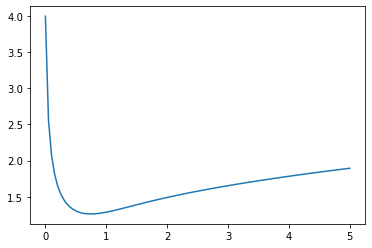

In [121]:
import scipy.integrate as sc_int
def f7(x,t):
    return(x-x**3+t)
x07=4
t7=np.linspace(0,5,100)
x7=sc_int.odeint(f7,x07,t7)
plt.plot(t7,x7)

__Exercice 5. (modèle monétariste canonique d'inflation chômage)__

Ce modèle repose sur 4 équations structurelles. La première équation exprime le taux de croissance des salaires $w$ en fonction du taux de chomage $U$ et du taux d'inflation anticipé par les individus $\pi$
$$
w(t)=- \beta U(t)+\alpha+h\pi(t), \qquad \alpha,\beta>0 \quad \mbox{et}\quad 0\leq h<1.
$$
La deuxième équation décrit le taux d'inflation réel $p$ en fonction du taux de croissance des salaires :
$$
p(t)=w(t) -T
$$
où $T$ est le taux de croissance de la productivité du travail supposé constant. La troisième équation décrit la variation du taux d'inflation anticipé $\pi$ par rapport au taux d'inflation réel $p$ :
$$
\pi'(t)=j(p(t)-\pi(t)), \qquad 0<j\leq 1.
$$
La quatrième équation décrit la variation du taux de chomage en fonction du taux d'inflation réel
$$
U'(t)=-k(m-p(t)), \qquad k>0,
$$
où $m$ est le taux de croissance de la masse monétaire que l'on suppose constant.

__1.__ A l'aide des deux premières équations exprimer à la main $p$ en fonction de $U$ et de $\pi$.

__2.__ A l'aide de votre réponse à la question __1.__, montrer que le vecteur $(\pi,U)$ résout l'équation différentielle ordinaire
$$
(6)\qquad \left\{ \begin{array}{l l}
\pi'=j(h-1)\pi-j\beta U+j(\alpha-T),\\
U'=kh\pi-k\beta U-k(m+T-\alpha) .
\end{array}\right.
$$

__3.__ On prend comme valeurs $\alpha=\frac 12$, $T=\frac 16$, $m=5$, $h=\frac 78$, $j=\frac 34$ et $k=\frac 12$. 

On choisit $\beta=1/2$. Tracer numériquement dans le plan la courbe $\{(\pi(t),U(t)), t\in[0,100] \}$ des valeurs prises par la solutions de (6) avec donnée initiale $(\pi(0),U(0))=(1,1)$. Tracer numériquement dans le même plan la courbe de donnée initiale $(\pi(0),U(0))=(4,0)$. Que constatez-vous ?

__4.__ On prend les mêmes valeurs pour $\alpha,T=,m=5,h,j,k=$ qu'à la question __3.__ et on choisit $\beta=10$. 

Tracer numériquement dans le plan, comme à la question __3.__, les courbes de solutions de (6) avec des données initiales de votre choix. Constatez-vous un changement par rapport aux trajectoires de la question __3.__ ?

__5.__ Calculer numériquement, pour les valeurs des paramètres $j,h,\beta,k$ des questions __3.__ et __4.__, les valeurs propres de la matrice $\begin{pmatrix} j(h-1) & -j\beta \\ kh & -k\beta \end{pmatrix}$. Expliquer alors les résultats numériques obtenus aux questions __3.__ et __4.__